In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
from torch.autograd import Variable

#import transforms as transforms
from skimage import io
from skimage.transform import resize
from torchvision.models import *

(720, 720, 3)


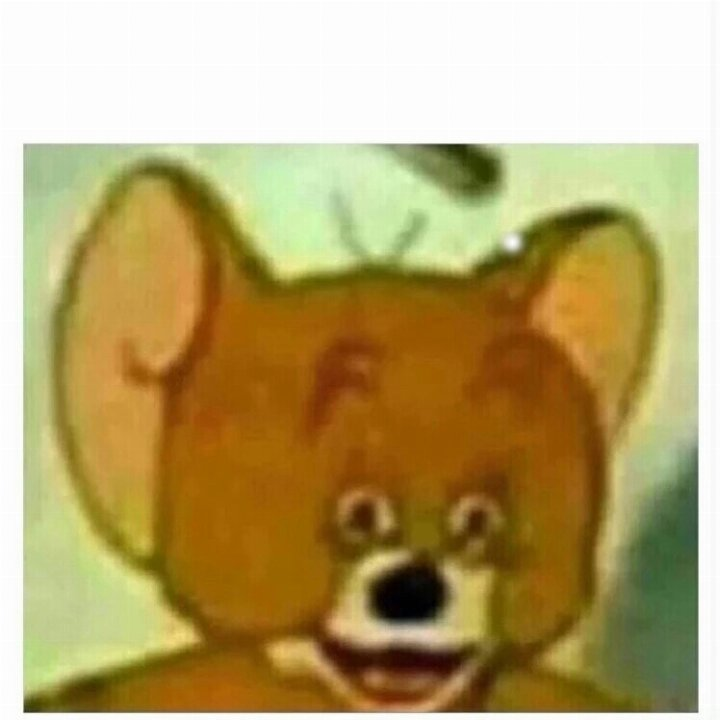

In [29]:
input_image = Image.open('/home/stepan/Documents/Work/practice_2022/Facial-Expression-Recognition.Pytorch/images/1.jpg')
print(np.array(input_image).shape)
display(input_image)

In [31]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /home/stepan/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/stepan/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [33]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

In [42]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

for layer in model.children():
    weights = list(layer.parameters())
    
print(weights)

#print(output[0])
#probabilities = torch.nn.functional.softmax(output[0], dim=0)
#print(probabilities)

[Parameter containing:
tensor([[-0.0092,  0.0153, -0.0375,  ..., -0.0105,  0.0011, -0.0265],
        [ 0.0104, -0.0266,  0.0005,  ...,  0.0288, -0.0210, -0.0067],
        [-0.0072,  0.0664, -0.0393,  ...,  0.0130, -0.0249, -0.0015],
        ...,
        [-0.0104, -0.0018, -0.0348,  ..., -0.0170,  0.1071,  0.0277],
        [-0.0168, -0.0059, -0.0287,  ..., -0.0214, -0.0048, -0.0133],
        [-0.0215,  0.0239,  0.0809,  ...,  0.0010, -0.0440,  0.0180]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([-9.0540e-03, -4.1489e-03, -2.0516e-02, -1.7642e-02,  9.6078e-03,
         5.8760e-03, -1.4448e-02,  7.1637e-04,  1.4057e-03, -1.6386e-03,
        -1.2073e-02, -9.3700e-03, -1.9250e-02, -1.7166e-02, -1.1226e-02,
        -1.6972e-02, -8.1289e-03, -1.3626e-02,  8.5068e-03, -1.7855e-02,
         6.9540e-03,  1.8412e-02, -2.4812e-03,  2.4328e-03, -1.3534e-03,
         4.8874e-03,  1.0521e-02, -8.0455e-04, -6.4342e-03, -1.1446e-02,
        -1.3326e-02, -9.2675e-03, -2.5